In [1]:
import pandas as pd
import seaborn as sns
from cnmfsns.config import Config
from cnmfsns.containers import Integration
config = Config.from_toml("scripts/example_config.toml")

data = Integration.from_config(config)

Reading /mnt/c/Users/verhe/MorrissyLab Dropbox/Proteomics/tmt_proteomics/cNMF/output/cptac_gbm_imputed_odg1_kl.h5mu
Reading /mnt/c/Users/verhe/MorrissyLab Dropbox/Proteomics/tmt_proteomics/cNMF/output/gbm_ffpe_proteogenomics_imputed_odg1_kl.h5mu
Reading /mnt/c/Users/verhe/MorrissyLab Dropbox/Proteomics/tmt_proteomics/cNMF/output/yonsei_imputed_odg1_kl.h5mu
Reading /mnt/c/Users/verhe/MorrissyLab Dropbox/Proteomics/tmt_proteomics/cNMF/output/diamandis_imputed_odg1_kl.h5mu


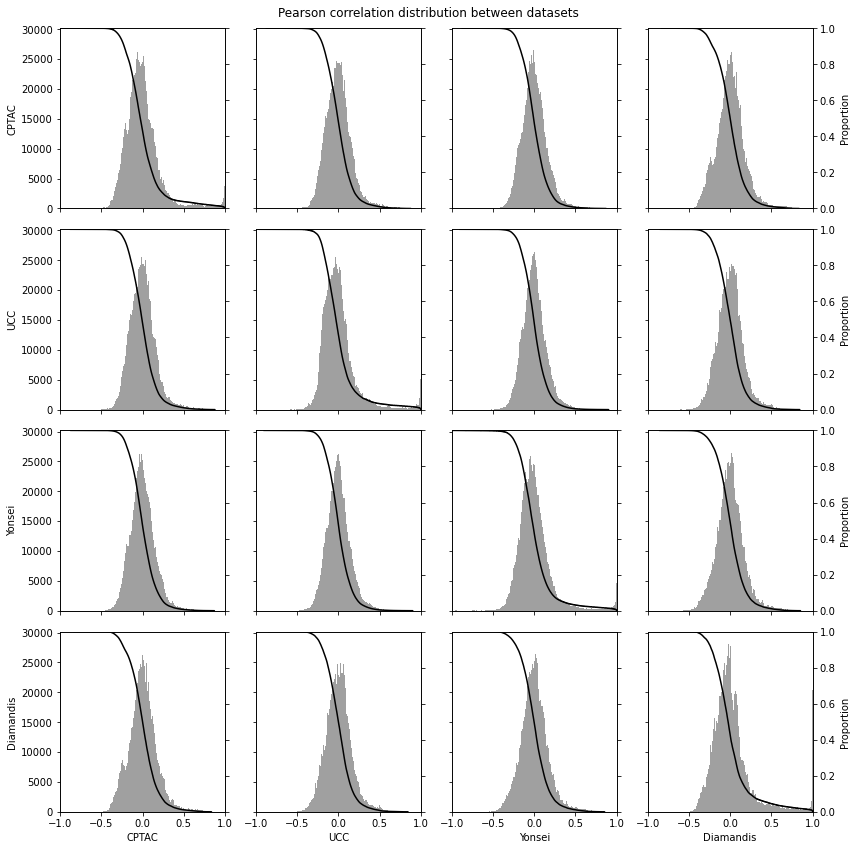

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_pairwise_corr(data, show_threshold=True):
    n_datasets = len(data.cnmfresults)
    fig, axes = plt.subplots(n_datasets, n_datasets, figsize=[3 * n_datasets, 3 * n_datasets], sharex=True, sharey=True)
    for row, dataset_row in enumerate(data.corr.index.levels[0]):
        for col, dataset_col in enumerate(data.corr.columns.levels[0]):
            ax = axes[row,col]
            corr = data.corr.loc[dataset_row, dataset_col].values.flatten()
            if show_threshold:
                hist_kwargs = {
                    "hue":[("Included" if c else "Excluded") for c in (corr > data.min_corr)],
                    "palette": {"Included": "red", "Excluded": "gray"},
                    "hue_order": ["Excluded", "Included"]
                }
                included_fraction = (corr > data.min_corr).sum() / corr.shape[0]
                ax.text(x=0.01, y=0.99, s=f"{included_fraction:.3f}", ha='left', va='top', transform=ax.transAxes, color="red", alpha=0.5)
            else:
                hist_kwargs = {"color": "gray"}
            sns.histplot(x=corr, ax=ax, linewidth=0,legend=(row == 0)&(col == 0), **hist_kwargs)
            secondary_ax = ax.twinx()
            sns.ecdfplot(x=corr, ax=secondary_ax, color="black", complementary=True)
            ax.set_ylabel(dataset_row)
            ax.set_xlabel(dataset_col)
            ax.set_xlim(-1,1)
            if col < n_datasets - 1:
                secondary_ax.set_yticklabels([])
                secondary_ax.set_ylabel("")
    fig.suptitle(f"{data.corr_method.capitalize()} correlation distribution between datasets")
    plt.tight_layout()

plot_pairwise_corr(data, show_threshold=False)

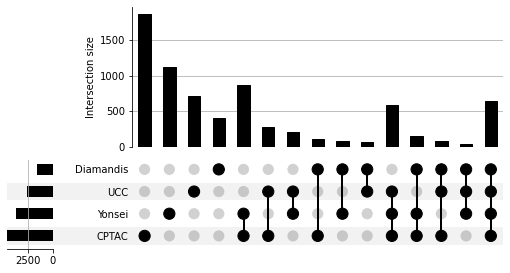

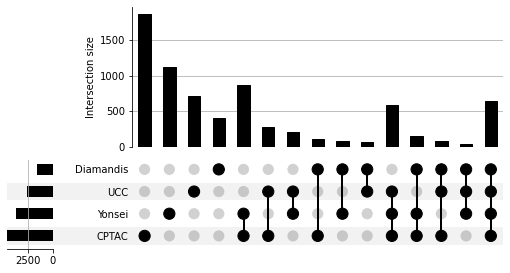

In [22]:
import upsetplot
genelists = {name: d.gene_list for name, d in data.cnmfresults.items()}
fig = plt.figure()
upsetplot.UpSet(upsetplot.from_contents(genelists)).plot(fig=fig)
fig.savefig()
